# Phase 2: Exploratory Analysis & Initial Visualization

In this notebook, we load the cleaned DataFrame (exported by `01_phase1_data_cleaning.ipynb`) and perform:
- Basic descriptive stats (mean, median, etc. of GPA).
- Visual distribution plots.
- Preliminary look at course/professor/term coverage.
- Optional detection of anomalies (e.g., GPA out of [0, 4] range).
- Optional drop rate analysis (if such a column exists).
- Example group-by analysis for professors/courses.

We assume `cleaned_grades.pkl` is available in the `analysis/data/` folder.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
input_file = os.path.join("..", "data", "cleaned_grades.pkl")
df = pd.read_pickle(input_file)

print("Loaded cleaned DataFrame from Phase 1.")
print(f"DataFrame shape: {df.shape}")
display(df.head(5))

Loaded cleaned DataFrame from Phase 1.
DataFrame shape: (9454, 10)


,Submission time,User ID,Term,Course,Professor,Grade distribution,Recommend professor?,enhanced_grade_dict,enhanced_calculated_gpa,gpa_status
0,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 120,"Voelker, Geoffrey M.","A+:11, A:41, A-:25, B+:41, B:28, B-:16, C+:12,...",NaN,"{'a+': 11, 'a': 41, 'a-': 25, 'b+': 41, 'b': 2...",3.137864,computable
1,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 132A,"Vianu, Victor Dan","A+:4, A:23, A-:19, B+:40, B:15, B-:27, C+:15, ...",NaN,"{'a+': 4, 'a': 23, 'a-': 19, 'b+': 40, 'b': 15...",2.966463,computable
2,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 141L,"Eldon, John","A+:1, A:28, A-:4, B+:2, B:0, B-:3, C+:0, C:3, ...",NaN,"{'a+': 1, 'a': 28, 'a-': 4, 'b+': 2, 'b': 0, '...",3.366667,computable
3,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 167,"Li, Tzumao","A+:102, A:22, A-:11, B+:5, B:7, B-:6, C+:2, C:...",NaN,"{'a+': 102, 'a': 22, 'a-': 11, 'b+': 5, 'b': 7...",3.709756,computable
4,2023-12-23T05:50:18.840Z,b144031aa5f07b5677aa3431b98f674d,Fall Qtr 2023,CSE 230,"Jhala, Ranjit","A+:29, A:42, A-:26, B+:16, B:7, B-:1, C+:0, C:...",NaN,"{'a+': 29, 'a': 42, 'a-': 26, 'b+': 16, 'b': 7...",3.743443,computable


=== Descriptive Stats for Computable GPA ===
Count: 8664
Mean: 3.30
Median: 3.32
Std Dev: 0.45
Min GPA: 0.00
Max GPA: 4.00


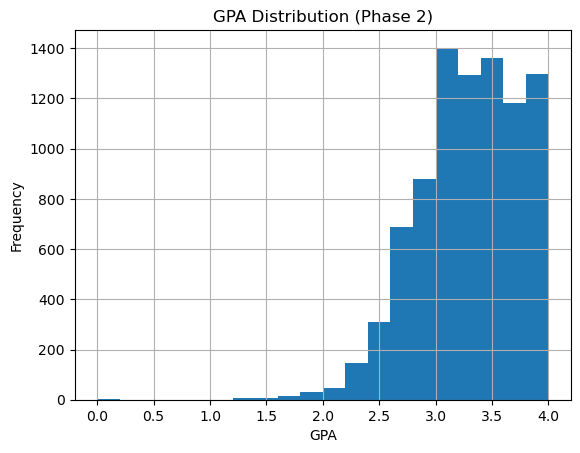

In [4]:
df_computable = df[df["gpa_status"] == "computable"].copy()

mean_gpa = df_computable["enhanced_calculated_gpa"].mean()
median_gpa = df_computable["enhanced_calculated_gpa"].median()
std_gpa = df_computable["enhanced_calculated_gpa"].std()
min_gpa = df_computable["enhanced_calculated_gpa"].min()
max_gpa = df_computable["enhanced_calculated_gpa"].max()

print("=== Descriptive Stats for Computable GPA ===")
print(f"Count: {len(df_computable)}")
print(f"Mean: {mean_gpa:.2f}")
print(f"Median: {median_gpa:.2f}")
print(f"Std Dev: {std_gpa:.2f}")
print(f"Min GPA: {min_gpa:.2f}")
print(f"Max GPA: {max_gpa:.2f}")

# Histogram
df_computable["enhanced_calculated_gpa"].hist(bins=20)
plt.title("GPA Distribution (Phase 2)")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()

In [5]:
num_courses = df["Course"].nunique()
num_professors = df["Professor"].nunique()
num_terms = df["Term"].nunique()

print("\n=== Coverage Info ===")
print(f"Unique courses: {num_courses}")
print(f"Unique professors: {num_professors}")
print(f"Unique terms: {num_terms}")

print("\nRecords per Term:")
term_counts = df["Term"].value_counts()
display(term_counts)


=== Coverage Info ===
Unique courses: 1261
Unique professors: 1409
Unique terms: 31

Records per Term:


Term
Fall Qtr 2023      1700
Spring Qtr 2023    1022
Winter Qtr 2023    1013
Winter Qtr 2024    1011
Fall Qtr 2022       978
Spring Qtr 2024     494
Fall Qtr 2024       490
Fall Qtr 2021       460
Winter Qtr 2022     459
Spring Qtr 2022     447
Winter Qtr 2025     210
Spring Qtr 2021     164
Winter Qtr 2021     159
Fall Qtr 2020       157
Sum Ses II 2023     149
Sum Ses II 2022      97
Sum Ses I 2023       93
Sum Ses I 2022       55
Sum Ses I 2024       50
Sum Ses II 2024      39
Winter Qtr 2020      36
Spring Qtr 2020      33
Fall Qtr 2019        30
Sum Ses I 2021       20
Sum Ses II 2021      17
Sum Ses II 2020      16
Sum Ses I 2020       16
SpecSumSes 2021      14
SpecSumSes 2023      11
SpecSumSes 2022       9
SpecSumSes 2024       5
Name: count, dtype: int64

In [6]:
# Check for GPA < 0.0 or > 4.0, which shouldn't normally happen
df_anomalies = df_computable[
    (df_computable["enhanced_calculated_gpa"] < 0.0) | 
    (df_computable["enhanced_calculated_gpa"] > 4.0)
]

if not df_anomalies.empty:
    print("Potentially anomalous GPA rows found:")
    display(df_anomalies[["Course", "Professor", "enhanced_calculated_gpa"]])
else:
    print("No anomalous GPA (<0 or >4) detected.")

No anomalous GPA (<0 or >4) detected.


In [7]:
# If there's a 'drop_rate' column (0 ~ 1), do descriptive stats & histogram
if "drop_rate" in df.columns:
    mean_drop = df["drop_rate"].mean()
    median_drop = df["drop_rate"].median()
    std_drop = df["drop_rate"].std()
    min_drop = df["drop_rate"].min()
    max_drop = df["drop_rate"].max()

    print("\n=== Drop Rate Descriptive Statistics ===")
    print(f"Count: {df['drop_rate'].notnull().sum()}")
    print(f"Mean drop rate: {mean_drop:.2%}")
    print(f"Median drop rate: {median_drop:.2%}")
    print(f"Std dev: {std_drop:.2%}")
    print(f"Min drop rate: {min_drop:.2%}")
    print(f"Max drop rate: {max_drop:.2%}")

    df["drop_rate"].hist(bins=20)
    plt.title("Drop Rate Distribution")
    plt.xlabel("Drop Rate")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("\nNo 'drop_rate' column found. Skipping drop rate analysis.")


No 'drop_rate' column found. Skipping drop rate analysis.


In [8]:
# Example: Group by Course to see average GPA
course_gpa = (df_computable
              .groupby("Course")["enhanced_calculated_gpa"]
              .mean()
              .sort_values(ascending=False))

print("Top 10 courses by average GPA (computable rows):")
display(course_gpa.head(10))

# Similarly, grouping by Professor
prof_gpa = (df_computable
            .groupby("Professor")["enhanced_calculated_gpa"]
            .mean()
            .sort_values(ascending=False))

print("\nTop 10 professors by average GPA:")
display(prof_gpa.head(10))

Top 10 courses by average GPA (computable rows):


Course
ENG 100L     4.0
ETHN 122     4.0
TDGE 100     4.0
CAT 124RS    4.0
EDS 180      4.0
MUS 95E      4.0
MUS 95JC     4.0
MUS 95K      4.0
BIMM 194     4.0
POLI 100G    4.0
Name: enhanced_calculated_gpa, dtype: float64


Top 10 professors by average GPA:


Professor
Hasty, Jeff M                4.0
Taylor, Alexander Lawther    4.0
Karlseder, Jan               4.0
Allen, Eric                  4.0
Kalleres, Dayna              4.0
Tran, Ly Thi Hai             4.0
Graham, Erin                 4.0
Henson, Matthew Alexander    4.0
Stone, Patricia              4.0
Byers, Barbara Lee           4.0
Name: enhanced_calculated_gpa, dtype: float64

# Next Steps

1. [Optional] Address any anomalies (e.g., negative or >4.0 GPA) by revisiting the parsing logic.
2. Compare GPA across professors or courses more thoroughly (boxplots, bar charts).
3. Convert `Term` to a standardized format if we want to do time-series or year-by-year analysis.
4. Integrate additional data (Drop rate, workload, project counts, etc.) to build advanced models or multi-factor ratings.
